# EDA on titanic dataset

## Introduction

#### Importing Important libraries

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/titanic dataset/Titanic-Dataset.csv')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
print('The shape of dataset is:', dataset.shape)

The shape of dataset is: (891, 12)


In [8]:
print('List of columns:', dataset.columns)

List of columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
print('Numerical features:', dataset.select_dtypes(include = ['int64', 'float64']).columns)

Numerical features: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [10]:
print('Categorical and string features:', dataset.select_dtypes(include = ['object']).columns)

Categorical and string features: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [11]:
#dropping column passenger ID as it is just a series number and adds no additional value
dataset = dataset.drop('PassengerId', axis=1)

#### Basic Statistics

In [12]:
#The info() method prints information about the DataFrame.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


It indicates that there are total of 891 passesnger details among which 177 people's Age is missing and 687 people's Cabin details are missing. And 2 people's Embarkation details are missing.

In [13]:
#It provides a quick summary of the central tendency, dispersion, and shape of a dataset's distribution.
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



*   More than 50% people have Pclass as 3








#### Missing Values & Data Cleaning


<Axes: >

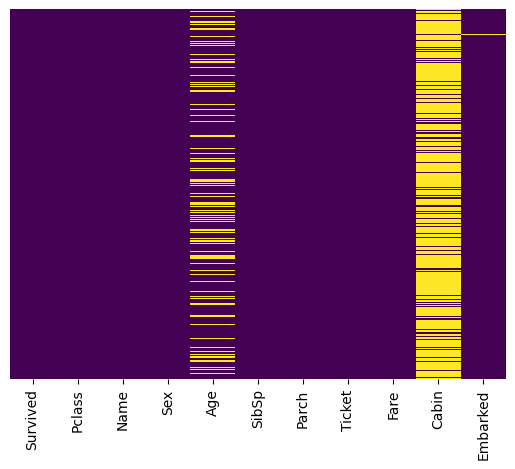

In [14]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
dataset.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687



This output shows that out of total datapoints we have 177 null values in age feature, 687 null values in Cabin feature and 2 null values in Embarked.

For embarked feature: As the number of missing values is less than 0.5% so we will simply drop it.

In [16]:
dataset = dataset.dropna(subset=['Embarked'])

For age feature: We handled the missing values by filling the nan values with the median of age

In [17]:
#For age feature:
median_age = dataset['Age'].median()
dataset['Age'] = dataset['Age'].fillna(median_age)

For cabin feature: We will simply create a new feature/column with name 'hascabin' with values 0/1.

As more than 75% of the values are missing. So, filling it with some values with be biased

In [18]:
#For cabin feature:
dataset['HasCabin'] = dataset['Cabin'].notnull().astype(int)
dataset = dataset.drop('Cabin', axis =1)

In [19]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### Feature–Target Split

In [20]:
X = dataset.drop("Survived", axis=1)   # features
y = dataset["Survived"]

## Univariate analysis (Single Column Study)

Univariate analysis examines a single variable at a time to describe its distribution, central tendency (like mean, median, mode), and dispersion (like standard deviation, range)

In [21]:
numerical_cols = dataset.select_dtypes('int64', 'float64').columns

In [22]:
numerical_cols

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'HasCabin'], dtype='object')

#### Count plots


<Axes: xlabel='Embarked', ylabel='count'>

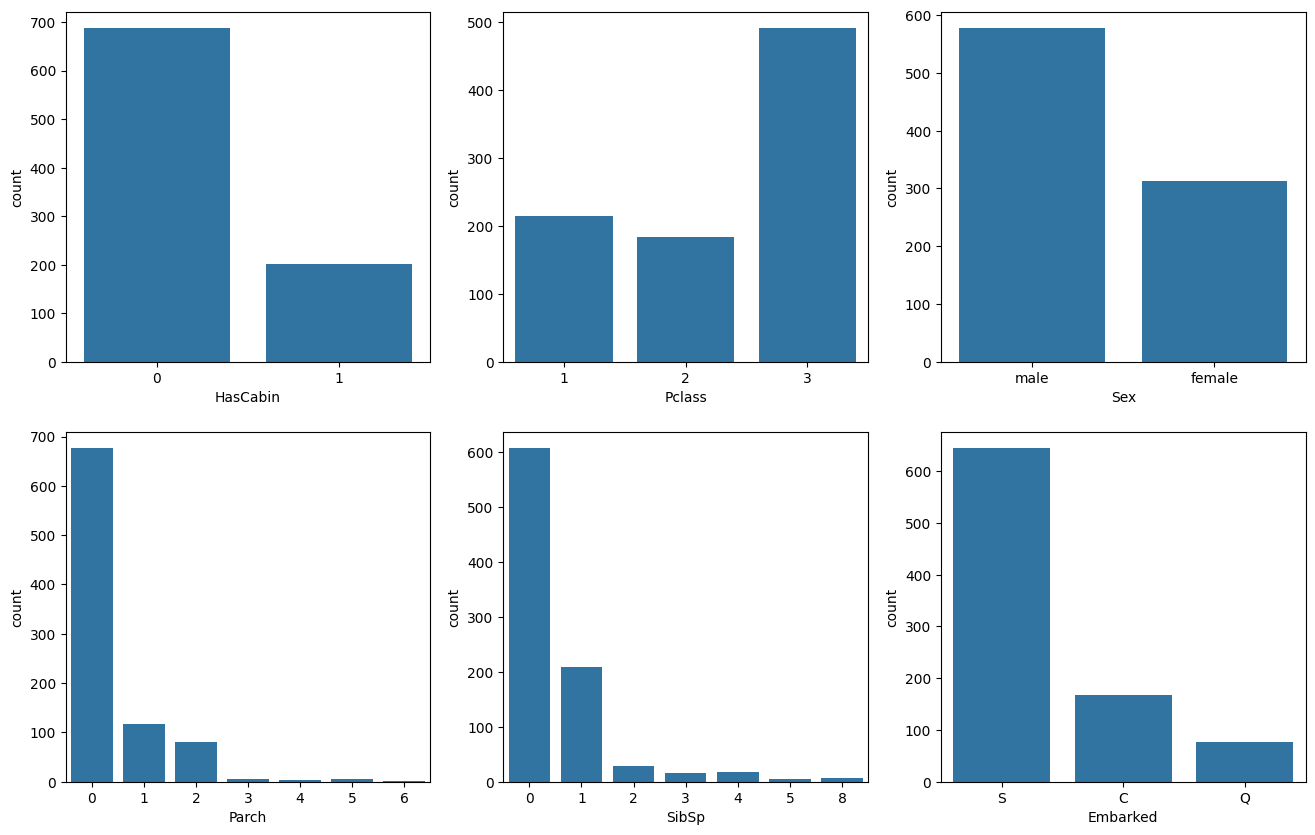

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

sns.countplot(x = 'HasCabin', data = dataset, ax = axes[0,0])
sns.countplot(x = 'Pclass', data = dataset, ax = axes[0,1])
sns.countplot(x = 'Sex', data = dataset, ax = axes[0,2])
sns.countplot(x = 'SibSp', data = dataset, ax = axes[1,1])
sns.countplot(x = 'Parch', data = dataset, ax = axes[1,0])
sns.countplot(x = 'Embarked', data = dataset, ax = axes[1,2])

#### Pie-Chart

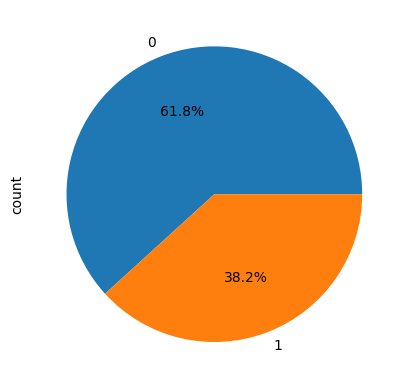

In [24]:
dataset['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

61.8% of passengers did not survived

#### Histogram + KDE

<Axes: xlabel='Fare', ylabel='Count'>

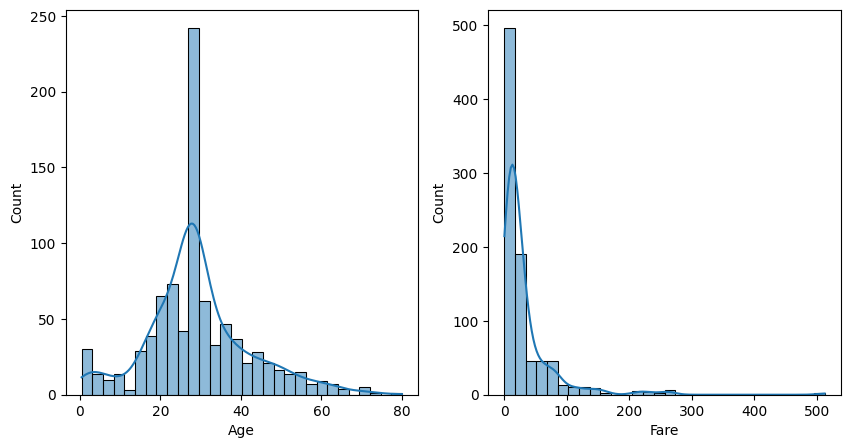

In [25]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.histplot(dataset['Age'], bins=30, kde=True, ax = axes[0])
sns.histplot(dataset['Fare'], bins=30, kde=True, ax= axes[1])


#### Detecting outliers

To check outliers in age feature we will simply check for max and min value of age feature. If the range of age feature lies between 0-80 there is no outlier in age.

In [26]:
#Detecting outliers in age feature.
print('Min age:', dataset['Age'].min())
print('Max age:', dataset['Age'].max())

if dataset['Age'].max() <= 80 and dataset['Age'].min() >= 0 :
  print('No outlier found in Age')
else:
  print('Possible outlier detected')


Min age: 0.42
Max age: 80.0
No outlier found in Age



**We will check Fare feature by using IQR**

In [27]:
#IQR

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Example for Fare
outliers_fare, lb_fare, ub_fare = detect_outliers_iqr(dataset, 'Fare')
print(f"Fare Outliers: {len(outliers_fare)}")
print(f"Lower Bound: {lb_fare}, Upper Bound: {ub_fare}")

Fare Outliers: 114
Lower Bound: -26.7605, Upper Bound: 65.6563


<Axes: xlabel='Fare'>

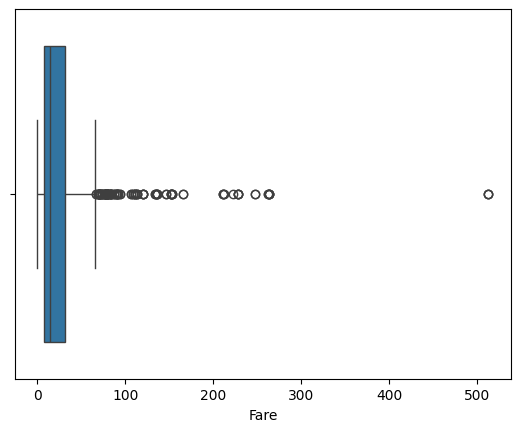

In [28]:
sns.boxplot(x=dataset['Fare'])

Although 114 fares lie outside the IQR bounds. They can represent wealthy 1st class passengers. We will cross check these values with pclass

<Axes: xlabel='Fare', ylabel='Count'>

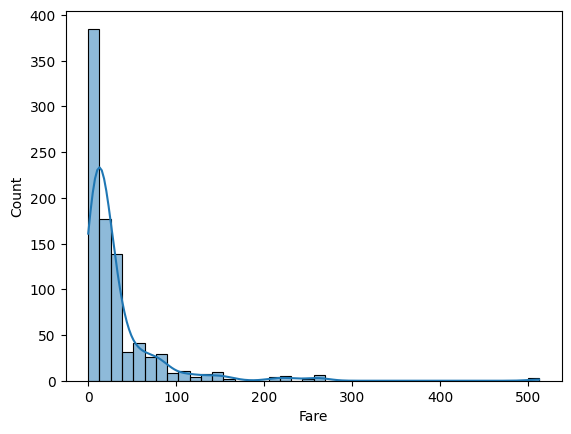

In [29]:
sns.histplot(dataset['Fare'], bins=40, kde=True)

*   Distribution is right-skewed.
*   Some very high values exist (mostly 1st class).

In [30]:
high_fare_passengers = dataset[dataset['Fare'] > 300]
print('There are total of', high_fare_passengers.shape[0], 'passengers who paid more than 300')

There are total of 3 passengers who paid more than 300


In [31]:
high_fare_passengers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,0
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,1
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,1


Only ~0.34% of passengers paid fares above 300, making them statistical outliers by IQR rules. However, these values represent genuine 1st class luxury cabins or last-minute purchases, not errors. Therefore, they are retained as valid values. For modeling, their impact will be minimized through log transformation.

Applying log to reduce right skewedness

In [32]:
dataset['Fare_log'] = np.log1p(dataset['Fare'])

<Axes: xlabel='Fare_log', ylabel='Count'>

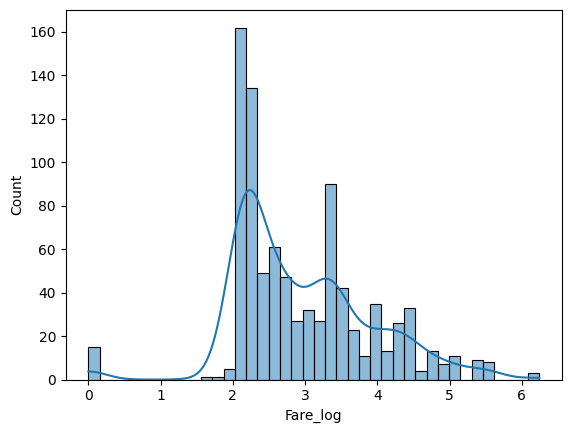

In [33]:
sns.histplot(dataset['Fare_log'], bins=40, kde=True)

Checking outliers for sibsp and parch

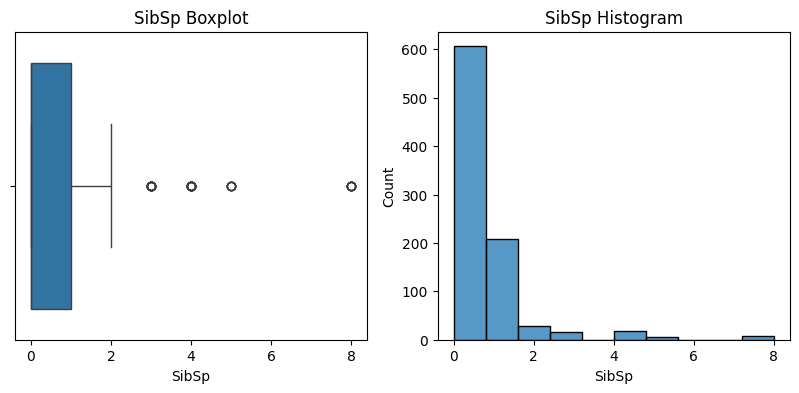

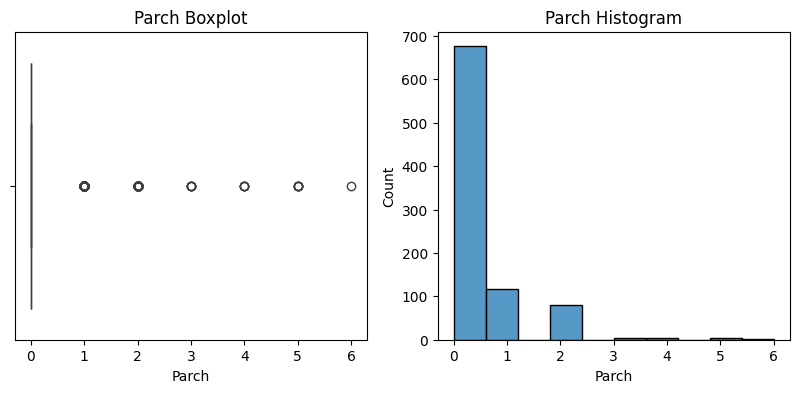

In [34]:
# SibSp
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=dataset['SibSp'])
plt.title("SibSp Boxplot")

plt.subplot(1,2,2)
sns.histplot(dataset['SibSp'], bins=10, kde=False)
plt.title("SibSp Histogram")
plt.show()

# Parch
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=dataset['Parch'])
plt.title("Parch Boxplot")

plt.subplot(1,2,2)
sns.histplot(dataset['Parch'], bins=10, kde=False)
plt.title("Parch Histogram")
plt.show()

**SibSp (Siblings/Spouses aboard):**

* Majority passengers had 0 or 1 sibling/spouse traveling with them.
* A small number of passengers had unusually large family groups (5–8 siblings/spouses).
* These are rare but valid values → they represent big families traveling together, not data errors.

**Parch (Parents/Children aboard):**

* Most passengers had 0 parents/children with them.
* A few had larger families (4–6 members).
* Again, these are valid but rare values, showing that some families traveled with many children/parents.

## Bivariate analysis (Feature vs Target)

#### Barplot

<Axes: xlabel='Embarked', ylabel='Survived'>

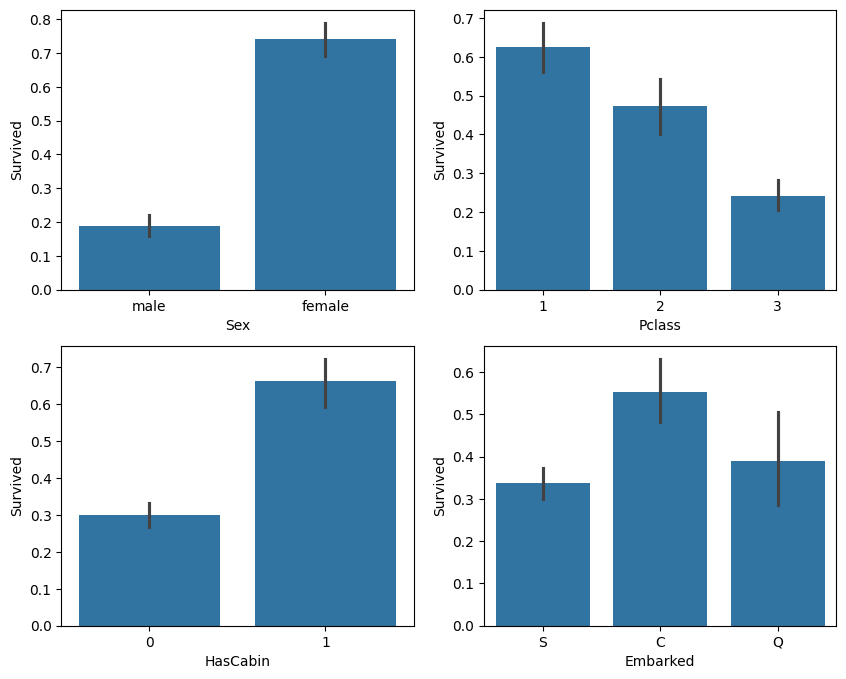

In [35]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))

sns.barplot(x='Sex', y='Survived', data=dataset, ax = axes[0,0])
sns.barplot(x='Pclass', y='Survived', data=dataset, ax = axes[0,1])
sns.barplot(x='HasCabin', y='Survived', data=dataset, ax = axes[1,0])
sns.barplot(x='Embarked', y='Survived', data=dataset, ax = axes[1,1])

Females, higher-class passengers, and those with cabins had much better survival chances. Passengers from port C also had relatively higher survival compared to S or Q.

#### Box-plot

<Axes: xlabel='Survived', ylabel='Fare_log'>

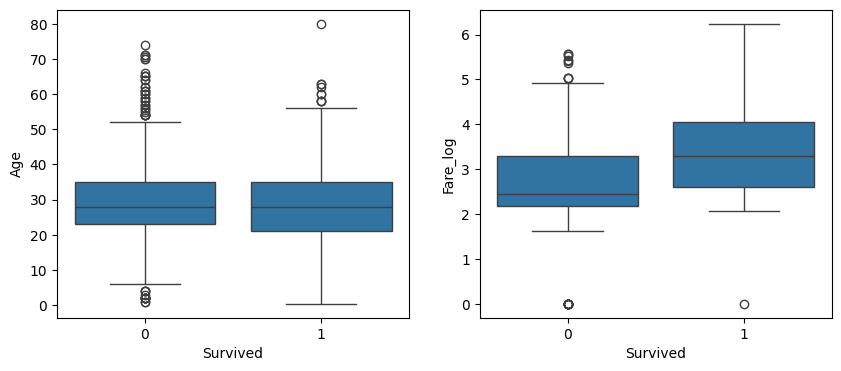

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x = 'Survived', y = 'Age', data = dataset, ax = axes[0])
sns.boxplot(x = 'Survived', y = 'Fare_log', data = dataset, ax = axes[1])

The boxplot suggests that younger passengers had a higher chance of survival, while older passengers were less likely to survive.

The boxplot shows that passengers who survived generally paid higher fares than those who did not survive. There are several high-fare outliers among survivors, indicating that first-class passengers had a higher chance of survival.

In [37]:
dataset.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    231
          male      109
Name: Survived, dtype: int64

Female passengers have survived more

## Multivariate Analysis

Feature vs Feature

<Axes: xlabel='Age', ylabel='Fare'>

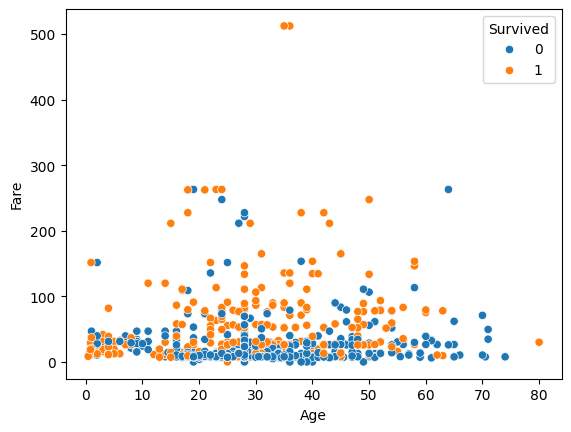

In [38]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=dataset)

The sactterplot shows people who paid higher fare and are of mid age group have survived more

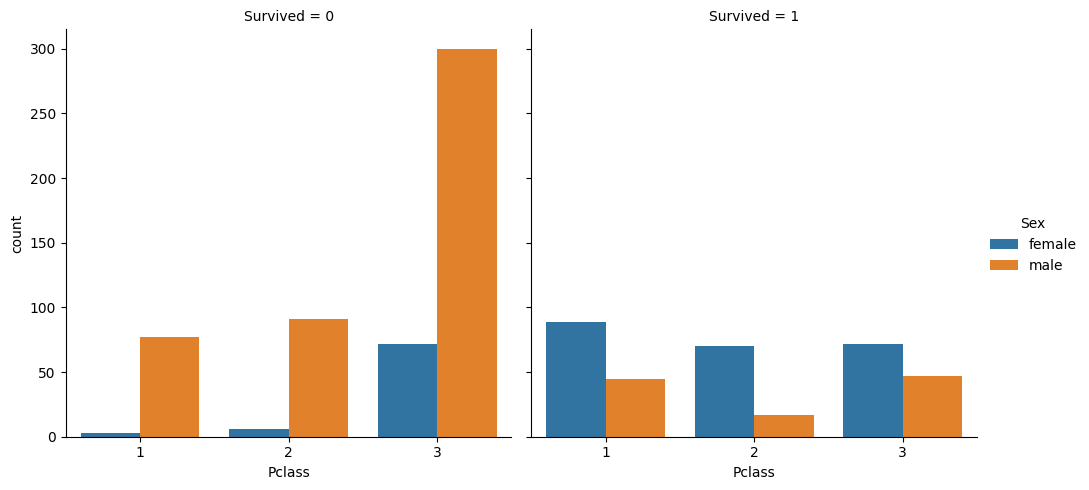

In [39]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=dataset, kind="count")

Women in 1st & 2nd class had the highest survival, men in 3rd class the lowest.

<Axes: xlabel='Sex', ylabel='Fare_log'>

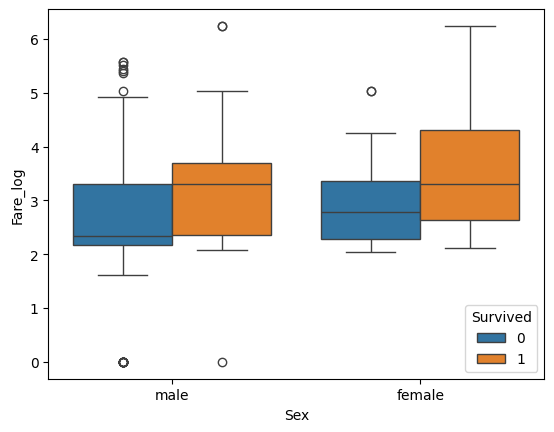

In [40]:
sns.boxplot(x="Sex", y="Fare_log", hue="Survived", data=dataset)


Females who paid more survived as compared to males

In [41]:
pd.crosstab(dataset['Pclass'], dataset['HasCabin'])

HasCabin,0,1
Pclass,,
1,40,174
2,168,16
3,479,12


#### Correlation and Heatmap

In [42]:
corr_data = dataset.drop(['Name', 'Ticket', 'Fare'], axis=1)
corr_data['Sex'] = corr_data['Sex'].map({'male': 0, 'female': 1})
corr_data['Embarked'] = corr_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

<Axes: >

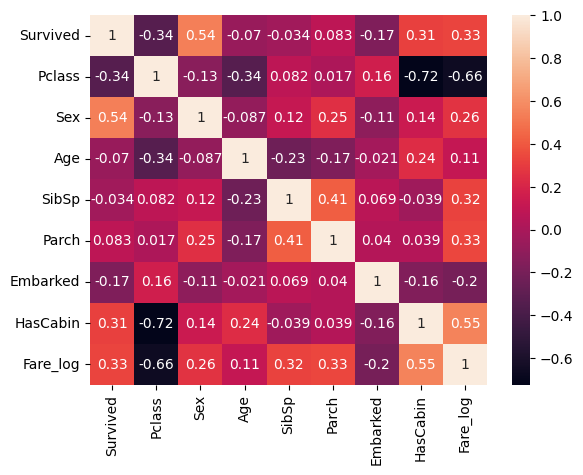

In [43]:
sns.heatmap(corr_data.corr(), annot=True)


The heatmap reveals that Pclass and Fare are highly correlated, suggesting redundancy. Age does not strongly correlate with other features, indicating it may add independent value. SibSp and Parch show mild correlation, making FamilySize a potential engineered feature. Survival shows strong association with Sex and moderate with Pclass and Fare, confirming their predictive importance.


## Feature Engineering

In [44]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Fare_log
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2.110213
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,4.280593
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,2.188856
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.990834
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,2.202765


#### Encoding Categorical data

In [45]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})
dataset['Embarked'] = dataset['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [46]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,Fare_log
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0,2.110213
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1,4.280593
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,0,2.188856
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,1,3.990834
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,0,2.202765


In [47]:
dataset.drop('Fare', axis=1, inplace=True)

In [48]:
print('Number of unique Tickets:',len(set(dataset['Ticket'])))

Number of unique Tickets: 680


There is no null values in ticket feature and out of 889 datapoints we have 680 unique tickets. It means there are group of people who share same ticket number.

In [49]:
ticket_counts = dataset['Ticket'].value_counts()

In [50]:
dataset['TicketGroupSize'] = dataset['Ticket'].map(ticket_counts)

We created a new feature as Ticketgroupsize which tells us how many people share the same ticket as this passenger.

The name feature itself is of no use. But these titles encode social status, gender, and sometimes age group → which are highly predictive of survival.

In [51]:
dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [52]:
print('Titles that are present in name:', dataset.Title.unique())

Titles that are present in name: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


There are some high class titles present like Major, Col, Capt. We will rename them as rare to uniquely indentify the High status people

In [53]:
rare_titles = ['Lady', 'Countess','Capt','Col','Don','Dr',
               'Major','Rev','Sir','Jonkheer','Dona']

In [54]:
dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

In [55]:
dataset.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

<Axes: xlabel='Title', ylabel='Survived'>

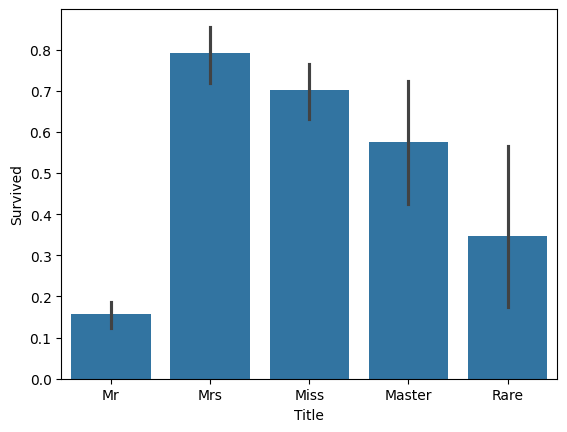

In [56]:
sns.barplot(x='Title', y='Survived', data=dataset)

Passengers with the title Mr had the lowest survival rates, while Mrs and Miss had the highest. Titles therefore capture social status, gender, and age information, making this feature very useful for modeling survival.

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Title'] = le.fit_transform(dataset['Title'])

In [58]:
# drop name feature

dataset.drop('Name', axis=1, inplace = True)
dataset.drop('Ticket', axis=1, inplace = True)

In [59]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,HasCabin,Fare_log,TicketGroupSize,Title
0,0,3,0,22.0,1,0,2,0,2.110213,1,2
1,1,1,1,38.0,1,0,0,1,4.280593,1,3
2,1,3,1,26.0,0,0,2,0,2.188856,1,1
3,1,1,1,35.0,1,0,2,1,3.990834,2,3
4,0,3,0,35.0,0,0,2,0,2.202765,1,2
